## Plant Disease Identifier

In this project we will create Convolutional Neural Network(CNN) to identify three plant diseases. Which are:
    1. Common Corn Rust
    2. Potato Early Blight
    3. Tomato Bacterial Spot
    
Main libray used for this project is Keras.


In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

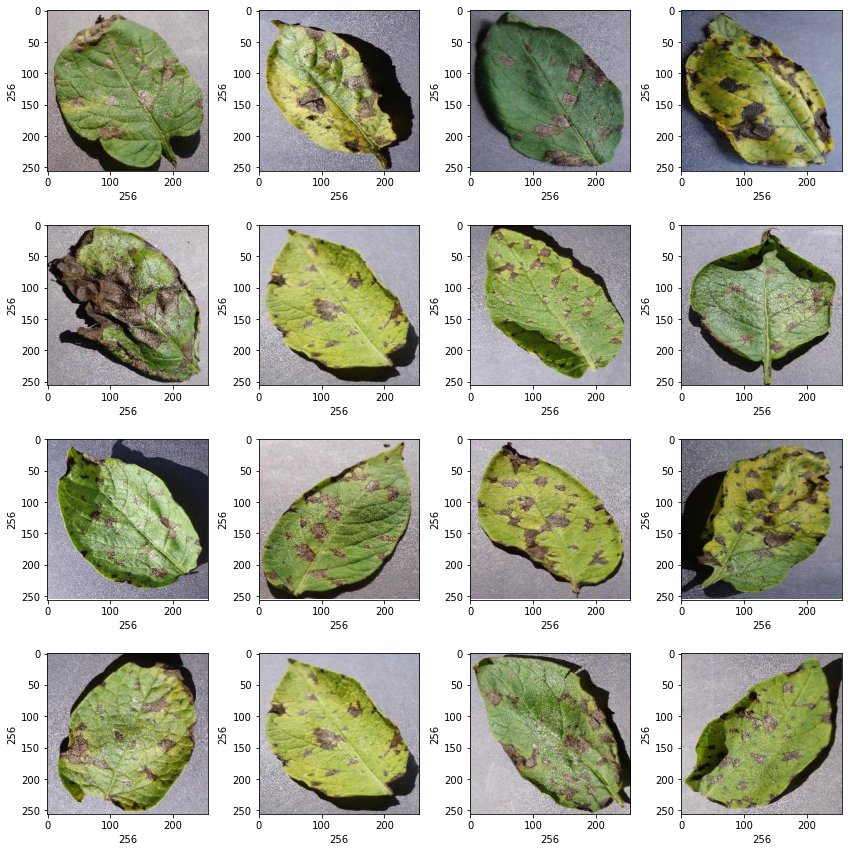

In [2]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "./data/Potato___Early_blight/"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [3]:
#Function to Converts Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
# Convert images to array
dir = "./data/"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [9]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [11]:
#Shape of array
image_list[0].shape

(256, 256, 3)

In [12]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [13]:
# spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 56) 

In [15]:
# Normalize the data
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
X_train = X_train.reshape( -1, 256,256,3)
X_test = X_test.reshape( -1, 256,256,3)

In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Convolutional Neural Network

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 225800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [22]:
# Splitting the training data set into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [24]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, y_val))

Epoch 1/50
5/5 [==============================] - 9s 538ms/step - loss: 1.0983 - accuracy: 0.3385 - val_loss: 1.0977 - val_accuracy: 0.3472
Epoch 2/50
5/5 [==============================] - 1s 234ms/step - loss: 1.0973 - accuracy: 0.3212 - val_loss: 1.0960 - val_accuracy: 0.3472
Epoch 3/50
5/5 [==============================] - 1s 235ms/step - loss: 1.0958 - accuracy: 0.3212 - val_loss: 1.0943 - val_accuracy: 0.3472
Epoch 4/50
5/5 [==============================] - 1s 232ms/step - loss: 1.0938 - accuracy: 0.3212 - val_loss: 1.0917 - val_accuracy: 0.3472
Epoch 5/50
5/5 [==============================] - 1s 232ms/step - loss: 1.0911 - accuracy: 0.3212 - val_loss: 1.0883 - val_accuracy: 0.3889
Epoch 6/50
5/5 [==============================] - 1s 234ms/step - loss: 1.0874 - accuracy: 0.3872 - val_loss: 1.0842 - val_accuracy: 0.5208
Epoch 7/50
5/5 [==============================] - 1s 231ms/step - loss: 1.0832 - accuracy: 0.5278 - val_loss: 1.0793 - val_accuracy: 0.5625
Epoch 8/50
5/5 [====

### Saving the model

In [25]:
model.save("model/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('model/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('model/plant_model_weights.h5')

### Evaluation

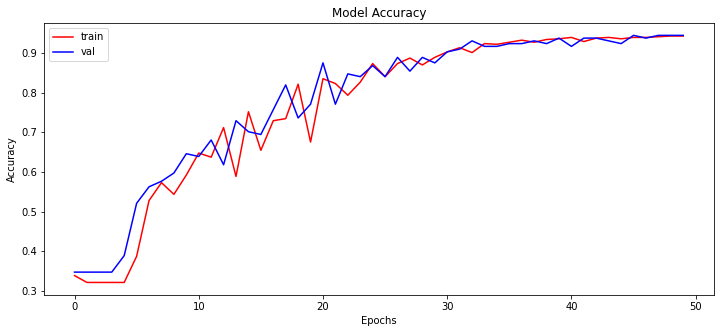

In [26]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [28]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 52ms/step - loss: 0.2653 - accuracy: 0.9556
Test Accuracy: 95.55555582046509


### Predict with test data

In [30]:
y_pred = model.predict(X_test)

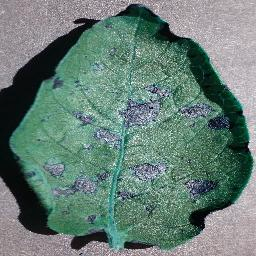

In [33]:
# Plotting image to compare
img = array_to_img(X_test[12])
img

In [34]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[12])])
print("Predicted : ",all_labels[np.argmax(y_pred[12])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [42]:
y_pred[12]

array([0.17532521, 0.74356323, 0.08111154], dtype=float32)